In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#rate at which we sample is at 44100 Hz
rate = 44100
#duration of sound file
dur = 5

#generate sin wave
def sin_wave(freq, rate, dur):
    x = np.linspace(0, dur, rate*dur, endpoint=False) #starting from 0 to dur with rate*dur samples
    y = np.sin(2*np.pi*freq*x) # calculate sin wave 2*pi*f*t
    return x, y


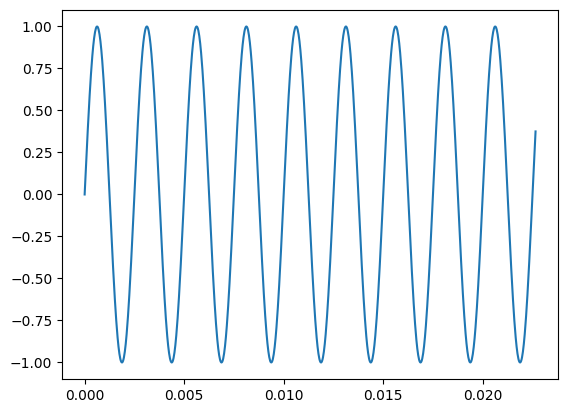

In [47]:
x,y = sin_wave(400, rate, dur)
plt.plot(x[:1000],y[:1000]) #2 periods in one second, would be hard for humans to hear

In [48]:
#convert to 16 bit
norm_tone = np.int16(y/y.max() * 32767) #normalizes the tone to 16 bit

In [49]:
from scipy.io.wavfile import write

In [14]:
write('my_sin_wave.wav', rate, norm_tone)

PLAY AROUND

In [28]:
#higher frequency

rate = 44100
dur = 5
x,y = sin_wave(4000, rate, dur)

newSinwave = np.int16(y/y.max() * 32767)
write('my_sin_wave2.wav', rate, newSinwave)

In [29]:
#adding the two sin waves together
newestSinwave = norm_tone + newSinwave
write('my_sin_wave3.wav', rate, newestSinwave)

In [30]:
#subtracting the two sin waves
neweerestSinwave = norm_tone - newSinwave
write('my_sin_wave4.wav', rate, neweerestSinwave)

In [31]:
final = (norm_tone * neweerestSinwave - newSinwave) * newSinwave
write('my_sin_wave5.wav', rate, final)

BACK TO PLAYTHROUGH

In [50]:
def multi_tone(freqs, rate, dur, norm=True):
    x, tone = sin_wave(freqs[0], rate, dur)
    signal = np.zeros_like(tone)
    for freq in freqs:
        _, tone = sin_wave(freq, rate, dur)
        signal += tone
    
    if norm:
        signal = np.int16(signal/signal.max() * 32767)
    return x, signal

In [51]:
x, signal = multi_tone([400, 4000], rate, dur)
write('high_freq_noise.wav', rate, signal)

In [52]:
from scipy.fft import rfft #real components fast fourier transform

In [53]:
N = rate*dur
yf = rfft(signal)
xf = rfft(N, 1/ rate)

ValueError: invalid number of data points (2.2675736961451248e-05) specified

In [ ]:
plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
yf[5000:] = 0
plt.plot(xf, np.abs(yf))

In [ ]:
from scipy.fft import irfft

new_signal = irfft(yf) #inverse real fourier transform

In [ ]:
plt.plot(new_signal[:1000]) #filtered file

In [ ]:
plt.plot(signal[:1000]) #unfiltered file